# Machine Learning Engineer Nanodegree
## Capstone Project
Olga Kudinova  
August 21st, 2017

## I. Definition

### Project Overview

**Problem Domain**

Understanding factors that influence housing prices is not a new problem. A number of research papers investigated how a combination of internal (property characteristics) and external (neighbourhood, accessibility, environmental characterisics) factors determines the sale price of the property. One of the most popular approaches, Hedonic Pricing analysis, was discussed in detail by Sheppard (Sheppard, 1999) and since has been widely used for estimation of housing prices. Traditionally this approach consideres property, neighborhood, accessibility and environmental characteristics when modeling the price (Ecosystem Valuation article). Some researchers also tried incorporating economic recession as another factor (Corsini, 2009). A model that can accurately predict sale price of a property has great value to the many stakeholders involved in the housing market, such as banks, byers, sellers and developers. Such a model would reduce the amount of uncertainty the agents are operating under and help the stakeholders make better investment decisions. Another popular application of this model is estimation of the value of ecosystem, land parcel and other commodities price for which cannot be directly observed (Ecosystem Valuation article).

I am interested in this problem, because buying a house is something most people go through in their lives, so this is a problem that I can personnally relate to. Moreover, I am really excited about the dataset I found on Kaggle, because it allows to consider effects of the internal property characteristics, all the tradictional external characteristics as well as economic factors (so analysis that was performed by Corsini can be expanded on). I am hoping to learn more about the factors that influence housing prices and contribute to the solution of the problem by documenting my findings.

<u>Literature reviewed:</u><br>
1. [Hu G., Wang J., Feng W. (2013) Multivariate Regression Modeling for Home Value Estimates with Evaluation Using Maximum Information Coefficient. In: Lee R. (eds) Software Engineering, Artificial Intelligence, Networking and Parallel/Distributed Computing 2012. Studies in Computational Intelligence, vol 443. Springer, Berlin, Heidelberg]([https://smartech.gatech.edu/bitstream/handle/1853/31763/Corsini_Kenneth_R_200912_mast.pdf])

2. [Candas E., Bagdatli Kalkan S., Yomralioglu T. (2015): Determining the Factors Affecting Housing Prices (7868). FIG Working Week, Sofia, Bulgaria]([https://www.fig.net/resources/proceedings/fig_proceedings/fig2015/papers/ts08j/TS08J_candas_bagdatli_kalkan_et_al_7868.pdf])

3. [Corsini K.R. (2009): Statistical analysis of residential housing prices in an up and down real estate market: a general framework and study of Cobb County, GA. Georgia Tech Theses and Dissertations [19733]]([https://smartech.gatech.edu/bitstream/handle/1853/31763/Corsini_Kenneth_R_200912_mast.pdf])

4. [Sheppard, S.(1999): Hedonic analysis of housing markets. Handbook of Regional and Urban Economics pp. 1595–1635]([http://www.acisinternational.org/Springer/SamplePaper.pdf])

5. [Ecosystem Valuation article on Hedonic Pricing Method]([http://www.ecosystemvaluation.org/hedonic_pricing.htm])

6. [Real Estate Apraisal, Wikipedia]([https://en.wikipedia.org/wiki/Real_estate_appraisal])


**Project Origin and realetd Datasets/Inputs**

The dataset that I am going to use to predict sale price of propreties in Moscow is available on kaggle.com and was released by a Russia's bank Sberbank as part of the ["Sberbank Russian Housing Market"](https://www.kaggle.com/c/sberbank-russian-housing-market/data) competition.

This dataset has information about 30,471 individual transactions over the period of Aug 2011 to Jun 2015. The features include:
- sale price of the property in question
- 291 property related features like:
    * size of the property (number of rooms, square footage, etc)
    * type of building the property is located in
    * description of the area (green zone, industrial zone)
    * access to education (number of preschools, schools, universities, etc in various proximities to the property)
    * access to cultural objects, shopping centers, offices, public transit, roads
    * demographoc profile of the area (number of people by age)
    * number of hospitals, cemeteries, morgues in the area
- 101 macroeconmic and financial sector indicators for each transaction date
    * oil price
    * inflation
    * GDP and GDP growth
    * indices for government bonds
    * mortgage volume
    * and many more

It is clear that Sberbank put a lot of thought into the features they have prepared for the competition and these features make a lot of sense for the property price prediction problem. Clearly, the price should reflect information about the property itself, as well as the economic situation in the region. One of the challenges here will be to select the best features among almost 400 possible options. Another challenge will be to build a regression model that will take selected features as inputs and return sale price prediction as close to the real sale price as possible.


### Problem Statement

The problem is to predict sale price of a property based on the property features (like the number of rooms, location, etc), neighbouhood features (like crime rates, schools), accessibility features (distances to work and shopping, transoprtation), environmental features (green zones, industrial zones) and macroeconomic indicators (like inflation rate, GDP, etc). The model is specific to Russian housing market. It is to be built for the biggest city in Russia, Moscow.

The target variable, sale price, is measurable and can be easily observed. Price cannot be predicted perfectly, but it can definitely be predicted with some errors. The benchmark model predicts an average price for the provided training dataset and assigns that value to any new property. Although this model is probably not the best possible model, it gurantees that the solution to the problem exists. 


Solution Statement

The solution to this problem requires a model that will be able to predict sale price of the property depending on the inputs provided. Since we need to predict a continuous quantity, sale price, the solution will be a regression model. The specific function for the regression will be selected as the result of the analysis, but a number of possible liner and non-lineat models will be evaluated and compared. Performance metric to compare the models and measure their success is [**Root Mean Squared Logarithmic Error**](https://www.kaggle.com/wiki/RootMeanSquaredLogarithmicError). The error will be calculated between predicted and actual prices. Model with lowest RMSLE will be selected at the final solution.


Project Design

I will be using Python to predict the sale price of a property. I am considering the following workflow:
1. Import all the necessary modules
2. Load the data. 
3. Join property dataset to the macroeconomic indicators dataset on the transaction timestamp.
4. Understand how the target variable changes (statustical summary on the sale price as well as time series trend)
5. Explore features
    - Impute missing values
    - Convert any categorical variables to dummies
    - Treat outliers
    - Create a Scatter matrix for some of the features
    - Implement feature scaling where appropriate
    - Dimentionality reduction / Feature engineering <br>
        - There are almost 400 features available for analysis, so it might be a good idea to reduce the dimentionality of the feature space since we only have 30k observations and the more features we consider, the more data we needto collect to be able to understand the relationships. I will try PCA and Clustering to see if any patterns emerge.
    - Create another scatter matrix for the newly engineered features. Will help select relevant features for the model.
    - Select the features for the analysis.
6. Separate target variable from features and split data into training, testing and validation sets.
7. After the data is ready for modelling, a number of regression models will need to be evaluated and compared to each other in order to find the best fit. The algorithms I am considering are:
    - [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
    - [Ridge Regression](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)
    - [Decision Tree Regressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
    - [Support Vector Regression, SVR](http://scikit-learn.org/stable/modules/svm.html#regression) (linear and non-linear kernels)
8. Evaluate performace of each algorithm using RMSLE, fine tune any hyperparameters available using Grid Search. Select the best version of each algorithm.
9. Compare final RMSLE scores between the models (and consider the time it takes to run the model) to select the best model.
10. Compare my model's performance with the benchmark model as well as other competitors' models. Summarize the results.

After completing all the above steps, I should have a working model.



### Metrics
Performance metric to measure the success of the solution will be [**Root Mean Squared Logarithmic Error**](https://www.kaggle.com/wiki/RootMeanSquaredLogarithmicError). The error will be calculated between predicted and actual prices using the following formula:

$$RMSLE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n}(ln(p_i+1)−ln(a_i+1))^2}$$

Where:
- $n$ is the total number of observations in the data set,
- $p_i$ is the predicted price,
- $a_i$ is the actual price.

Why RMLSE? 
-	RMSLE penalizes an under-predicted estimate greater than an over-predicted estimate, and when it comes to giving mortgages to people, it is better to air on the side of caution.
-	I believe that the underlying relationship between our target variable (price) and features might be well described with a linear model (more discussion to follow), and Squared Error loss is one of the most widely used loss functions in linear models estimation. Therefore, it makes sense to use related Root Mean Squared Error at the estimate of how good the model works.
-	Taking square root makes the units of the error comparable to the units of the target variable – easy to interpret what this error actually means.
-	The ‘Logarithmic’ comes from the need to take log() of the price, because by itself it is very volatile and not really distributed normally. Log() helps to normalize the price. So technically, we are going to use RMSE on the transformed target, log(price).
-	Finally, RMLSE is used on Kaggle and I will need to compare my model to Kaggle’s leaderboard. 


## II. Analysis

### Data Exploration
First, let's load all the necessary libraries and the data provided by Sberbank for the kaggle competition ["Sberbank Russian Housing Market"](https://www.kaggle.com/c/sberbank-russian-housing-market/data).

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
from matplotlib import pyplot as pl
from matplotlib import gridspec
import seaborn as sns
# Pretty display for notebooks
%matplotlib inline

# Read Sberbank data
data = pd.read_csv("data\\train.csv", parse_dates=['timestamp']) # load property related features
kaggle_test = pd.read_csv("data\\test.csv", parse_dates=['timestamp']) # load property related features
#data_macro = pd.read_csv("data\\macro.csv") # load macroecnomic and financial sector indicators
print "Sberbank data read successfully!"

Sberbank data read successfully!


<u>Note</u>:
- 'data' is what I am going to use as my training data, because it has information about the sale price. I will split it into training, validation and testing sets later and will refer to them as such.
- 'kaggle_test' data doesn't have sale price, so I can't use it to fit/tune my models. It can be used, however, for comparing performace of my final model to the benchmark published on kaggle.com and other solutions. I will use it in the very end of the notebook and will refer to it as 'kagge test data'.

Let's take a look at the data.

In [2]:
print 'The dataset has {:,} rows and {:,} columns => {:,} data points.\n'.format(data.shape[0],data.shape[1],data.size)
print 'Sample data:'
display(data.head()) # Print the first few entries of the Sberbank data
print '\nAvailable data types:'
display(data.get_dtype_counts())


The dataset has 30,471 rows and 292 columns => 8,897,532 data points.

Sample data:


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452



Available data types:


datetime64[ns]      1
float64           119
int64             157
object             15
dtype: int64

**So, we have:**
1. so many features (292), that they don't fit into the table with smaple data *--> Need some sort of grouping in order to wrap your head arounf all the features as well as dimensionality reduction.*
2. some missing values *--> further analysis required*
3. categorical data as well as numeric data *--> preprocessing of categorical data required*

**Let's start addressing the above observations in order:**

**1. A lot of features:** <br> To better understand all the features available, I have grouped some of them together and created an extended data dictionary.

In [3]:
# Import modified data dictionaries
dict_prop_features = pd.read_csv("data_dictionary_property_features.csv")
#dict_macro = pd.read_csv("data_dictionary_macro_indicators.csv")

display(dict_prop_features.head())
print "I have created {} feature groups:".format(len(dict_prop_features.groupby('feature_grp')['id'].count()))
display(dict_prop_features.groupby('feature_grp')['id'].count())

,id,feature,feature_grp,desc
0,1,price_doc,target,sale price
1,2,id,id,transaction id
2,3,timestamp,timestamp,date of transaction
3,4,full_sq,property - size,"total area in square meters, including loggias..."
4,5,life_sq,property - size,"living area in square meters, excluding loggia..."


I have created 29 feature groups:


feature_grp
big roads                       9
church                         14
creepy things in the area       6
demographic composition        28
education                      14
healthcare                      3
id                              1
industrial zone                19
jobs in the area               15
location                        2
market                         10
mosque                          7
other buildings in the area    16
owner-investor                  1
parks and green zones          12
property - condition            1
property - contruction info     2
property - floor                2
property - size                 5
public transit - bus            2
public transit - metro          5
public transit - railroad      13
target                          1
things to do                    6
things to do - cafe            66
things to do - cultural         5
things to do - shopping        14
things to do - sport           12
timestamp                       1
Na

I grouped all the features to better understand them and so that I can reduce dimentionality by applying PCA to feature groups. This will help explain the meaning of the components I get as well as reduce dimentionality. I can also perform other transformations within feature groups.

I will perform detailed investigation of the feature groups in the next section, but I would like to point out some commonalities regarding the features here:
- many features represent highly relates measurements like 'distance to A' measured in km (for cars) and min (walking). Clearly these features will be highly correlated and we will need to address this later. Example of such features below.

In [4]:
# show all features for the selected feature group
dict_prop_features[dict_prop_features.feature_grp == 'public transit - metro'].sort_values(['feature'],axis=0)

,id,feature,feature_grp,desc
85,86,ID_metro,public transit - metro,NaN
87,88,metro_km_avto,public transit - metro,kilometers to metro by car
89,90,metro_km_walk,public transit - metro,"kilometers to metro, walking"
86,87,metro_min_avto,public transit - metro,minutes to get to metro by car
88,89,metro_min_walk,public transit - metro,"minutes to get to metro, walking"


- a lot of features are created as counts or sums of 'x' given condition 'y'. The condition is often a radius in km around the property. Features are often created for multiple radiuses, hence, there will be correlation again because larger radiuses include smaller ones. Example below.

In [5]:
dict_prop_features[dict_prop_features.feature_grp == 'things to do - cafe'].sort_values(['feature'],axis=0)

,id,feature,feature_grp,desc
186,187,cafe_avg_price_1000,things to do - cafe,avg price of a visit to a caf� within 1000m of...
209,210,cafe_avg_price_1500,things to do - cafe,avg price of a visit to a caf� within 1500m of...
232,233,cafe_avg_price_2000,things to do - cafe,avg price of a visit to a caf� within 2000m of...
255,256,cafe_avg_price_3000,things to do - cafe,avg price of a visit to a caf� within 3000m of...
163,164,cafe_avg_price_500,things to do - cafe,avg price of a visit to a caf� within 500m of ...
278,279,cafe_avg_price_5000,things to do - cafe,avg price of a visit to a caf� within 5000m of...
183,184,cafe_count_1000,things to do - cafe,the number of x within 1000m of the property
187,188,cafe_count_1000_na_price,things to do - cafe,number of cafes within d meters of the propert...
189,190,cafe_count_1000_price_1000,things to do - cafe,number of cafes within d meters of the propert...
190,191,cafe_count_1000_price_1500,things to do - cafe,number of cafes within d meters of the propert...


I won't spend more time on feature description here. I think feature groups that I have created are quite self explanatory and have high potential of being relevant for the analysis. 

<u>To Do</u>:
- Study selected feture groups together
- Instead of including all features by default and then dropping some after analysis, I will decide what to include after my extensive explorations.

**2. Missing data:** <br> Let's take a look at how many features have missing values and how much data is missing within each of those features.

Only 51 features out of 291 have data missing.


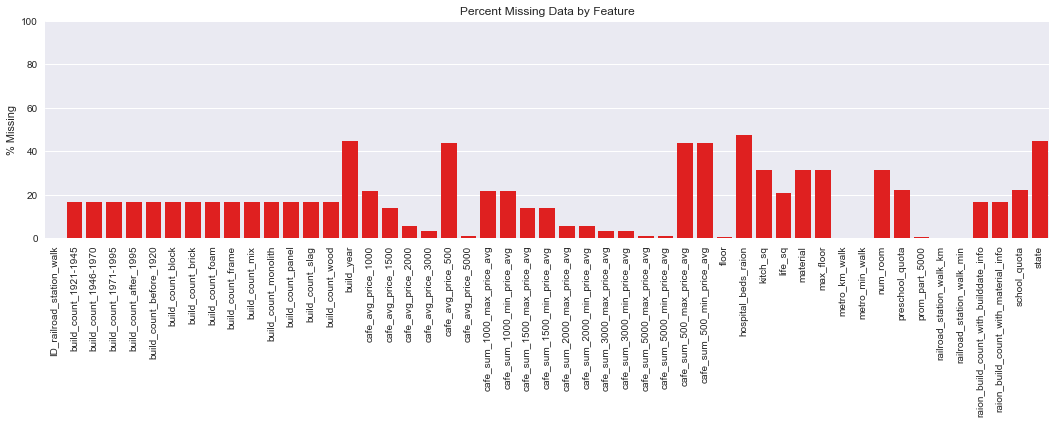

In [6]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_index(ascending=True)

print "Only {} features out of {:,} have data missing.".format(int(data_na.shape[0]), int(data.shape[1]-1))

f, ax = pl.subplots(figsize=(18, 4))
pl.xticks(rotation='90')
sns.barplot(x=data_na.index, y=data_na, color='red')
ax.set_ylim(0,100)
ax.set(title='Percent Missing Data by Feature', ylabel='% Missing')
pl.show()

I have ordered the data in the plot by feature alphabetically, becuase there are 2 clear groups of related features that constitute majority of the features with missing data:
* Info related to the area (raion) - how many buildings of what type and what age are in there in the area. 
* Info related to the average/min/max price of the bill in a cafe within x meters of the property.
<br>**=> I believe that these features can be safely excluded from the analysis because:**
- there are more features describing presence of cafes in the area
- information about the type of buildings in the area is good info, but I don't think I can impute ~20% of the missing values properly. In order to sensibly take care of the missing values, one would have to pay close attention to the geographical proximity of different raions, because there features are calculated at area level. I am going to say it is outside of my scope of analysis.

As per the rest of the features, I believe it is safe to completely exclude features with more than 1% of missing data. If you look at those features, you will realize that the dataset still has a lot of other features without missing data that communicate the same information, so I don't think there will be a lot of information loss. Also, I chose 1% as the cut off because the features that seem to be important based on my general knowledge all have less then 1% of data missing.

<u>To Do</u>:
- If more than 1% of data is missing, do not include those features into the model.

**3. Categorical data:** <br> 
Before we can fit a model, we need to take care of the categorical data. A few things to note:
- Some columns are of data type 'object', so we need to encode the string values with numbers
- Some columns are already encoded with numbers, but they are nontheless categorical and it might make sense to create dummies out of them and not use them as is.

First, let's consider categorical variables of type 'object'.

In [7]:
print "We have {} 'object' varaibles in the dataset.".format(data.describe(include = ['object']).shape[1])
display(data.describe(include = ['object']))

We have 15 'object' varaibles in the dataset.


,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
count,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471,30471
unique,2,146,2,2,2,2,2,2,2,2,2,2,2,2,5
top,Investment,Poselenie Sosenskoe,no,no,no,no,no,no,no,no,no,no,no,no,poor
freq,19448,1776,28543,28817,28155,30175,19600,29335,27649,29608,27427,28134,29690,29578,8018


Based on the summary description above, we can conclude that out of the 15 'object' variables:
- 12 are yes/no indicators, so they can be replaced with one dummy each.
- `product_type` is really a dummy as well, but with Investment/Owner option. I will create a dummy for Owner, since Investment in more frequent in the dataset (according  to the statistical description provided).
- `ecology` has 5 unique values that can be reasonably ordered (No Data --> Poor --> Satisfactory --> Good --> Excellent) - I will econde them respectively as 0,1,2,3,4,  so that 'No Data' won't have any effect on the price, and the other values are ordered so that price is expected to increase with increase in these values, all other things equal.
- `sub_area` (raion) has a lot of unique values which cannot be sensibly ordered, because they are area names. I do not think that creating 146 dummies is sensible. I could group these areas by their location or based on price, but I will just drop this feature since these are the names of the areas, which in theselves don't matter. What matters is where that area is geographically or how prestigious the area is. I believe other features contain this info.

Let's move on to numerical data types that might actually represent categorical data.
First, create a DataFrame of all column names and respective counts of unique values.

In [8]:
# create a dictionary that stores column names and corresponding info (unique values, count of unique values, data type)
unique_values_dict = {}
for col in data:
    a=data[col].unique()
    a.sort()
    unique_values_dict[col]={'dtype': data[col].dtype,
                             'values': a,
                             'count_unique_values': len(data[col].unique())
                            }
# use this dictinoary to create a DataFrame
unique_values = pd.DataFrame.from_dict(unique_values_dict, orient='index')

print "The dataset potentially contains {} numerically encoded categorical features. \nNeed to check though."\
    .format(unique_values[(unique_values.count_unique_values <100)\
                          &(unique_values.index.str.contains('_count_')==False)\
                          &(unique_values['dtype']<>'object')]\
            ['dtype'].count())

display(unique_values[(unique_values.count_unique_values <100)&(unique_values.index.str.contains('_count_')==False)&(unique_values['dtype']<>'object')])

The dataset potentially contains 21 numerically encoded categorical features. 
Need to check though.


,dtype,values,count_unique_values
ID_big_road1,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",48
ID_big_road2,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",58
ID_bus_terminal,int64,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]",14
ID_railroad_terminal,int64,"[5, 32, 50, 83, 97, 101, 113, 121]",8
additional_education_raion,int64,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 16]",12
culture_objects_top_25_raion,int64,"[0, 1, 2, 3, 4, 10]",6
floor,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",42
healthcare_centers_raion,int64,"[0, 1, 2, 3, 4, 5, 6]",7
hospital_beds_raion,float64,"[0.0, 30.0, 32.0, 35.0, 46.0, 75.0, 80.0, 100....",80
kitch_sq,float64,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",75


At a closer look, one can see that majority of the variables are actually true numeric variables. Only a few are numerically encoded categorical variables:
- `ID_big_road1`, `ID_big_road2`, `ID_bus_terminal`, `ID_railroad_terminal` are encoded names of the roads and stations. If I was to use these features, I would probably need to create a dummy for every single one of them. I don't think ordinal schale makes sense here. But really, the station itself won't probably have to do with anything, what will really matter is the proximity to the city center. So I am inclined to leave these out.
- the remaining features are identified using the following logic: values starting with 1 and incremented by 1 (if a categorical variable is encoded, I don't think anyone would start with 0 or skip certain numbers). This reasoning also doesn't contradict feature names/infered descriptions. We are left with `material` and `state`. 
    - I am excluding `state` as discussed before because there are a lot of nulls.
    - `material` is available for every observation, so I will keep it and create 6 dummies for it 
    
<u>To Do</u>:
- replace all 'yes' and 'Investment' values with 1, all 'no' and 'Owner Occupied' values with 0
- create 6 dummies for `material`
- encode `ecology` (No Data, Poor, Satisfactory, Good, Excellent  --> 0, 1, 2, 3, 4)

### Exploratory Visualization

Now, let's discuss all the features in detail.

**Let's start by exploring the target variable `price_doc`.**
Summary statistics will give an overall idea of any missing values (that's why I also include count of ID) and distribution of values. Since price is measured in Russian rubles (RUB), there is a lot of variance in the measurements. Taking logarithm is a customary way of scaling/normalizing financial measurements and I think it is appropriate to do it here.

In [9]:
# log transformation for financial data is usually a good idea
data['log_price_doc']=np.log1p(data.price_doc)
# also need some periods for graphs
data['year']=data.timestamp.dt.year # extract year from the timestamp - to plot seasonal trends YoY
data['month']=(data.timestamp.dt.month) # extract month from the timestamp - cast as string, to create dummies for seasonality
# Generate summary statistics for the target variable
pd.options.display.float_format = '{:,.2f}'.format
display(data[['id','price_doc','log_price_doc']].describe())

,id,price_doc,log_price_doc
count,"30,471.00","30,471.00","30,471.00"
mean,"15,237.92","7,123,035.28",15.61
std,"8,796.50","4,780,111.33",0.60
min,1.00,"100,000.00",11.51
25%,"7,620.50","4,740,002.00",15.37
50%,"15,238.00","6,274,411.00",15.65
75%,"22,855.50","8,300,000.00",15.93
max,"30,473.00","111,111,112.00",18.53


One plot is usually not enough to understand all the details about a variable's behavior, so I spent some time writing code for several plots. I wanted to see how price is behaving over time at daily and monthly granularity. I also wanted to check its distribution and presence of outliers. 

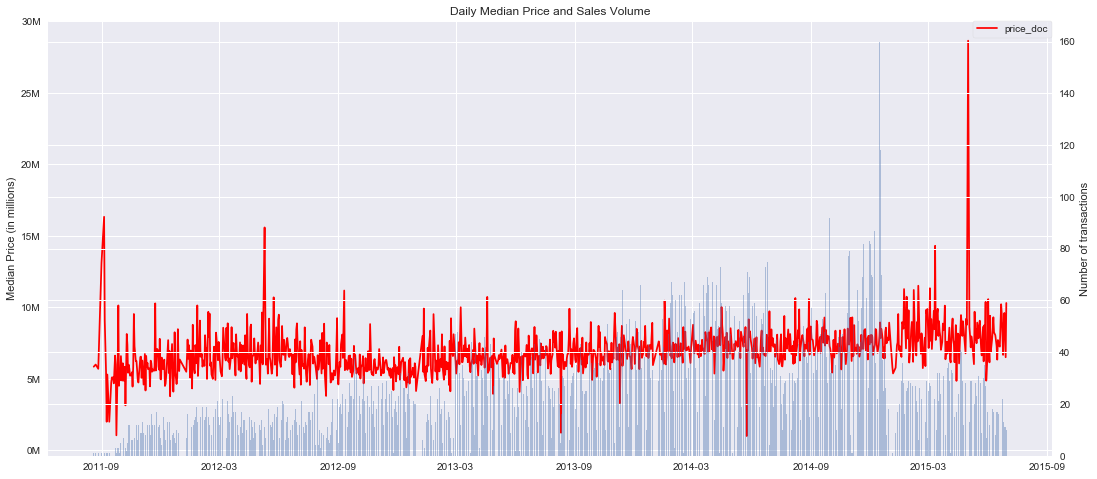

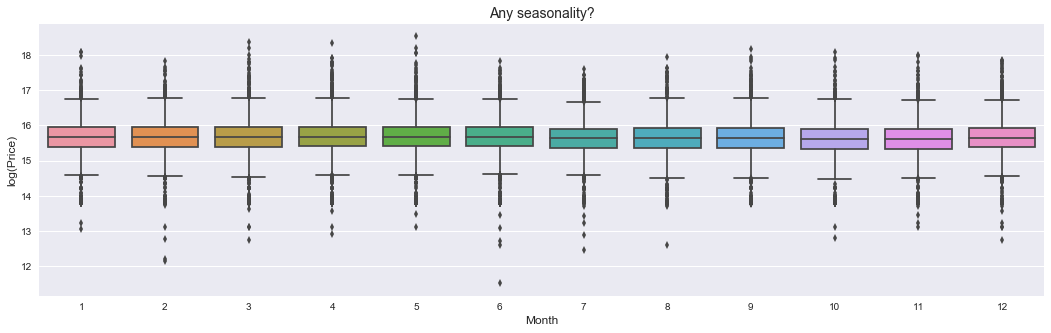

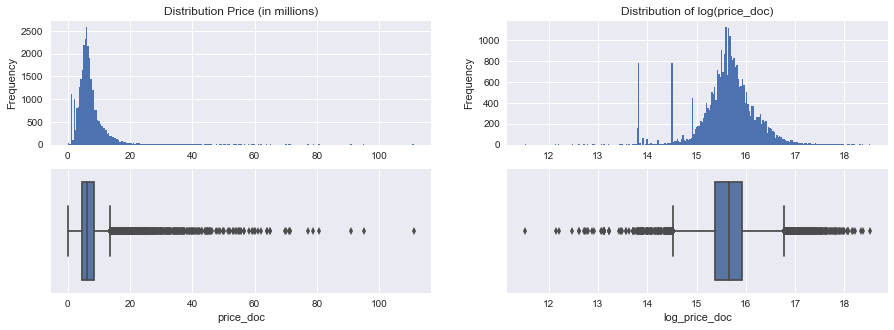

In [10]:
# I wrote a lot of code to plot various things related to Price.
# I packaged the code into a python executable file not to cluter the notebook
%run -i 'plot_price.py'

Observations:
- Price is very volatile
- Distribution of log(price) is definitely less skewed and closer to Normal, so I will use log(price) as my target variable for analysis.
- Box plots show that Price has a lot of outliers (points outside of 1.5xIQR). I think it might be a good idea to split the data into "normal" prices and "ridiculous" prices and first build a model that would be able to assign a property to one of these 2 classes and after that build a regression model for each class separately.
- I can't really detect any seasonality from the Box Plots, but looks like summer months take a little dip. I think it is a good idea to include month of sale as a variable: create 12 dummies for months or 4 dummies for seasons.

#### Now, let's explore the rest of the variables.
First, define some functions that will help with the exploration.

In [11]:
def plot_corr_heatmap(corrmat, w=18, h=10, fmt='.2f'):
    f = pl.figure(figsize=(w,h))
    # plot correlation heatmap
    pl.title('Correlation Heatmap')
    pl.xticks(rotation='90')
    sns.heatmap(corrmat, linewidths=.5, annot=True, fmt=fmt)
    pl.show()

*** >> Group 1: Property related features ***

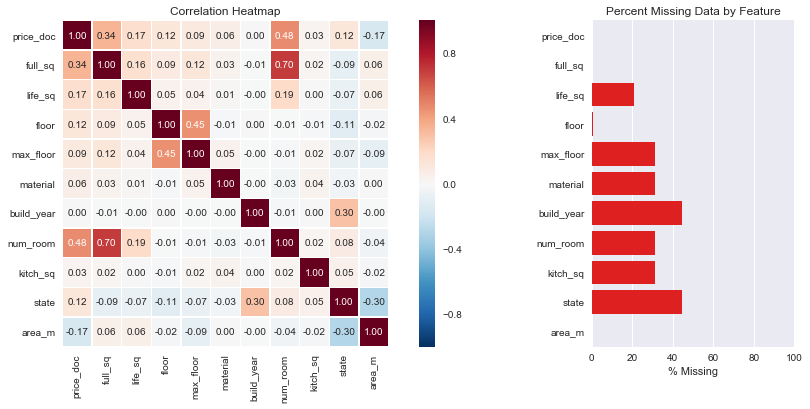

In [12]:
# create a list of features that belong to "property" feature groups + target variable
property_features = ['price_doc'] + dict_prop_features[dict_prop_features.feature_grp.str.contains('property - ')==True]['feature'].values.tolist()
property_features_nulls = (data[property_features].isnull().sum() / len(data)) * 100
corrmat = data[property_features].corr()

f = pl.figure(figsize=(16,6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
# plot correlation heatmap
ax0 = pl.subplot(gs[0])
ax0.set(title='Correlation Heatmap')
pl.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True, fmt='.2f')
# plot % missing values by feature
ax1 = pl.subplot(gs[1])
sns.barplot(x=property_features_nulls, y=property_features_nulls.index, color='red', orient="h")
pl.xlim(0,100)
ax1.set(title='Percent Missing Data by Feature', xlabel='% Missing')
pl.show()

A lot of features are missing over 20% of data. I don't feel comfortable imputing this much data, so I will drop these features.

- Price seems to be most correlated with full_sq and num_room. These two features are also very highly correlated amongst themselves and num_room is missing for over 30% of observations, so I suggest to use **`full_sq`**.
- Next come `life_sq`, `are_m`, `state`, `floor` and `max_floor`:
    - `life_sq` is missing for about 20% of observations --> exclude
    - `area_m` is negatively correlated with price and not really correlated with anything else (except for state) --> keep
    - `state` is missing for over 40% of observations --> exclude
    - `floor` is highly correlated with max_floor --> keep because max_floor will be excluded
    - `max_floor` is [not very reliable](https://www.kaggle.com/captcalculator/a-very-extensive-sberbank-exploratory-analysis) and is missing ~30% of observations --> exclude
    
Features to use:
**`['full_sq', 'floor','are_m']`** --> take log().

*** >> Group 2: Demographic composition related features ***

0.0 % data missing across all the variables.


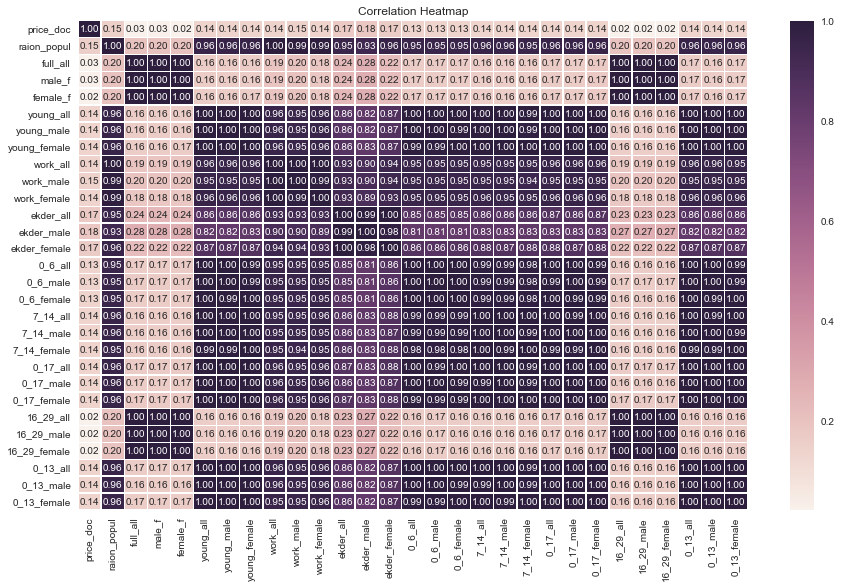

In [13]:
# create a list of features that belong to "demographic composition" feature groups + target variable
demo_features = ['price_doc'] + dict_prop_features[dict_prop_features.feature_grp.str.contains('demographic composition')==True]['feature'].values.tolist()
print "{} % data missing across all the variables.".format(((data[demo_features].isnull().sum() / len(data)) * 100).sum())
corrmat = data[demo_features].corr()

plot_corr_heatmap(data[demo_features].corr(), w=15, h=9)

Looks like all the demographic variables are extremely highly correlated amongst themselves. We can't use all the suggested slices of age/gender. None of these features has a very strong correlation with price. Let's see of PCA helps, but I think that I should just use `raion_popul` and `full_all` - they are not very correlated between each other and are somewhat correlated with price.

*** >> Group 3: Public Transit related features ***

0.33 % data missing across all the variables.


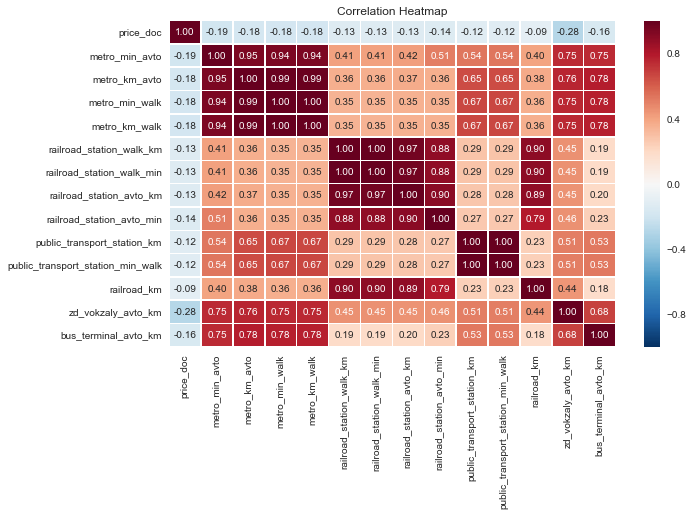

In [14]:
# create a list of features that belong to "public transit" feature groups + target variable
transit_features = ['price_doc'] + dict_prop_features\
        [(dict_prop_features.feature_grp.str.contains('public transit')==True)\
         &\
        (dict_prop_features.feature.str.contains('ID')==False)]\
    ['feature'].values.tolist()
print "{:.2f} % data missing across all the variables.".format(((data[transit_features].isnull().sum() / len(data)) * 100).sum())

plot_corr_heatmap(data[transit_features].corr(), w=10, h=6)

- As expected, proximity (in km or min) to public transit correlates with negatively with price - the further is public transit, the lower is the price.
- Proximity to zd_vokzaly (railroad stations) appears to correlate with the price the most, but I think it has to do more with the fact that all railroad stations are located in the city center, so it is proximity to the city center that show here, not so much the importance of the railroad stations.
- Correlation between proximity to subway (metro) and price is second highest, because subway is the main type of public transit in the city of Moscow. Subway is available all over the city, so it is a true effect I think.
- All transit features are extremely highly correlated between each other. Measuring the same distances in min and km for walking and driving doesn't help either - of course these would be extremely highly correlated, it doesn't make sense to use all of them together.

I will try to see if reducing dimensionality via PCA yeilds resonable features.


*** >> Group 4: Big Roads and Location ***

First, a few notes:
- Moscow is a non grid city, it has a circular layout. Kremlin is in the center and a few major circular roads formed around it in this order: Bulvar Ring, Sadovoe Ring, TTK (Third Trasport Ring (Kolco in Russian)) and, finally, MKAD.
- Normally, people think about which Ring they are around and it matters if you are inside or outside a particular ring.
- The way that the `bulvar_ring_km`,`sadovoe_km`,`ttk_km` and `mkad_km` are engineered doesn't reflect this. The distance to each ring is measured in absolute terms, so if you are 3km to Sadovoe Ring, you might be in Kremlin or by TTK - both properties will get the same measurement. You can see this from the descriptive summary below -  there are no negative values.

In [15]:
display(data[['kremlin_km','bulvar_ring_km','sadovoe_km','ttk_km','mkad_km','big_road1_km','big_road2_km']].describe())

,kremlin_km,bulvar_ring_km,sadovoe_km,ttk_km,mkad_km,big_road1_km,big_road2_km
count,"30,471.00","30,471.00","30,471.00","30,471.00","30,471.00","30,471.00","30,471.00"
mean,16.04,15.02,14.06,11.32,6.27,1.88,3.40
std,8.44,8.48,8.34,8.07,5.14,1.30,1.87
min,0.07,0.00,0.00,0.00,0.01,0.00,0.00
25%,10.46,9.26,8.35,5.34,2.63,0.78,2.10
50%,14.88,13.61,12.75,9.84,5.47,1.72,3.21
75%,20.67,19.95,18.72,15.68,8.18,2.81,4.32
max,70.74,69.98,68.85,66.03,53.28,7.00,13.80


- Only `kremlin_km` makes sense, because Kremlin is in the very center of the city, so distance to Kremlin shows how far out the properties are: very expansive properties are within 10-15 km of Kremlin. Further away variation really decreases.

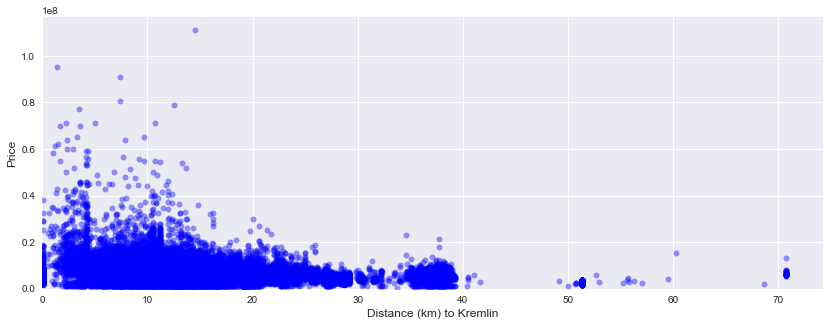

In [16]:
# scatter plot of Prices vs kremlin_km
fig, ax = pl.subplots(figsize=(14,5))
ax.scatter(data.kremlin_km, data.price_doc, color='b', s=30, alpha=.4)
pl.xlim(0,ax.get_xlim()[1])
pl.ylim(0,ax.get_ylim()[1])
pl.xlabel('Distance (km) to Kremlin', fontsize=12)
pl.ylabel('Price', fontsize=12)
pl.show()

- The rest of the features do not really showcase all the information they could, because of the way they were created. You will see this below in the correlation heatmap - `bulvar_ring_km`,`sadovoe_km`,`ttk_km` and `mkad_km` are very highly correlated amongst themselves and have a negative correlation with price.

I would like to introduce dummy variables that will indicate that the property is in proximity to a major transportation ring. I have selected distances after studying the map of Moscow and considering how far apart these rings are.

In [17]:
def prox_to_roads_ind(df):
    
    # Create indicators to describe proximity to major roads
    df['bulvar_ring_ind'] = np.zeros((df.shape[0],1))
    df.loc[df['bulvar_ring_km'] < 0.3, 'bulvar_ring_ind'] = 1.0 # within 300m of Bulvar Ring

    df['sadovoe_ind'] = np.zeros((df.shape[0],1))
    df.loc[(df['sadovoe_km'] < 0.3) | ((df['sadovoe_km'] < 1)&(df['bulvar_ring_km'] > 0.4)), 'sadovoe_ind'] = 1.0 # within 1km of Sadovoe Ring

    df['ttk_ind'] = np.zeros((df.shape[0],1))
    df.loc[df['ttk_km'] < 2, 'ttk_ind'] = 1.0 # within 2km of TTK

    df['mkad_ind'] = np.zeros((df.shape[0],1))
    df.loc[df['mkad_km'] < 5, 'mkad_ind'] = 1.0 # within 5km of MKAD

    df['big_road1_ind'] = np.zeros((df.shape[0],1))
    df.loc[df['big_road1_km'] < 1, 'big_road1_ind'] = 1.0 # within 1km of big_road1

    df['big_road2_ind'] = np.zeros((df.shape[0],1))
    df.loc[df['big_road1_km'] < 2, 'big_road2_ind'] = 1.0 # within 2km of big_road2
    
    return

In [18]:
prox_to_roads_ind(data) # Create indicators to describe proximity to major roads for training data
prox_to_roads_ind(kaggle_test) # Create indicators to describe proximity to major roads for kaggle_test data - to be used later

0.33 % data missing across all the variables.


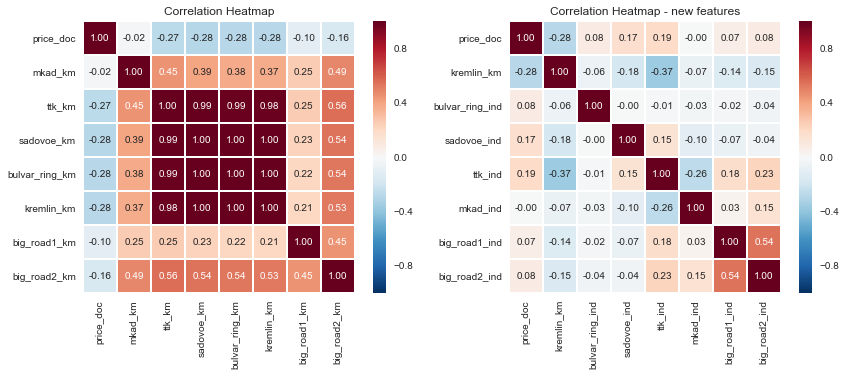

In [19]:
# create a list of features that belong to "big roads" feature groups + target variable
roads_features = ['price_doc'] + dict_prop_features\
        [((dict_prop_features.feature_grp.str.contains('big roads')==True)\
         |\
         (dict_prop_features.feature_grp.str.contains('location')==True))\
         &\
        (dict_prop_features.feature.str.contains('ID')==False)]\
    ['feature'].values.tolist()
print "{:.2f} % data missing across all the variables.".format(((data[transit_features].isnull().sum() / len(data)) * 100).sum())
corrmat = data[roads_features].corr()

roads_features_new = ['price_doc','kremlin_km','bulvar_ring_ind','sadovoe_ind','ttk_ind','mkad_ind','big_road1_ind','big_road2_ind']
corrmat_new = data[roads_features_new].corr()

f = pl.figure(figsize=(14,5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
# plot correlation heatmap
ax0 = pl.subplot(gs[0])
ax0.set(title='Correlation Heatmap')
pl.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True, fmt='.2f')
# plot - kremlin_km & price
ax1 = pl.subplot(gs[1])
ax1.set(title='Correlation Heatmap - new features')
pl.xticks(rotation='90')
sns.heatmap(corrmat_new, square=True, linewidths=.5, annot=True, fmt='.2f')
pl.show()

You can see that after the transformations that I have performed, features are no longer correlated amongst themselves and the correlation to price changed from negative to positive, because close proximity to major transportation rings is a desirable feature of the property.

Features to use:
**`['kremlin_km', 'bulvar_ring_ind','sadovoe_ind','ttk_ind','mkad_ind','big_road1_ind','big_road2_ind']`** --> apply log() to 'kremlin_km'

*** >> Group 5: Creepy things in the neighborhood ***

I group the following items as 'creepy': `'incineration_raion', 'detention_facility_raion', 'cemetery_km', 'incineration_km', 'hospice_morgue_km', 'detention_facility_km'`. I expect that proximity to these facilities has negative effect on price.

0.33 % data missing across all the variables.


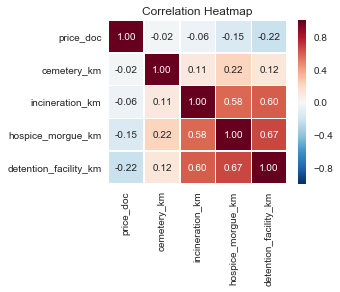

In [20]:
# create a list of features that belong to "creepy" feature groups + target variable
creepy_features = ['price_doc'] + dict_prop_features\
        [(dict_prop_features.feature_grp.str.contains('creepy')==True)\
         &\
        (dict_prop_features.feature.str.contains('ID')==False)]\
    ['feature'].values.tolist()
print "{:.2f} % data missing across all the variables.".format(((data[transit_features].isnull().sum() / len(data)) * 100).sum())

plot_corr_heatmap(data[creepy_features].corr(), w=4, h=3)

I think it is best to use the original features.

Features to use:
**`['cemetery_km', 'incineration_km','hospice_morgue_km','detention_facility_km']`** --> take log()

*** >> Group 6: Parks and Green Zones***

0.00 % data missing across all the variables.


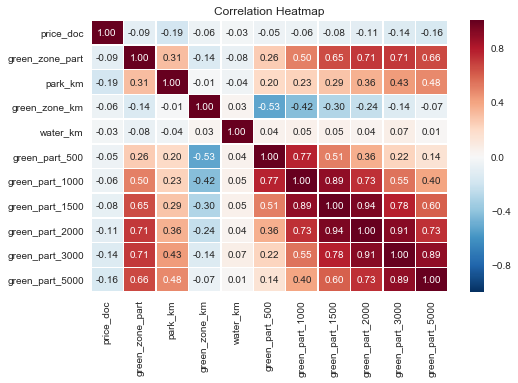

In [21]:
# create a list of features that belong to "parks and green zones" feature groups + target variable
green_features = ['price_doc'] + dict_prop_features[dict_prop_features.feature_grp.str.contains('parks and green zones')==True]['feature'].values.tolist()
print "{:.2f} % data missing across all the variables.".format(((data[green_features].isnull().sum() / len(data)) * 100).sum())

plot_corr_heatmap(data[green_features].corr(), w=8, h=5)

I could apply PCA on these features, but I prefer to simply get rid of the `green_part_x` features because they are highly correlated to each other and are also correlated to the 3 features I would like to keep - `park_km`, `green_zone_km`, `green_zone_part`. I will also keep `water_km`. This way it is easier to interpret the data and it seems like an easy choice, given the correlations.

Features to use:
**`['park_km', 'green_zone_km', 'green_zone_part','water_km']`** --> apply log() to all but `green_zone_part` (it is already scaled to [0,1]).

*** >> Group 7: Industrial Zones***

0.58 % data missing across all the variables.


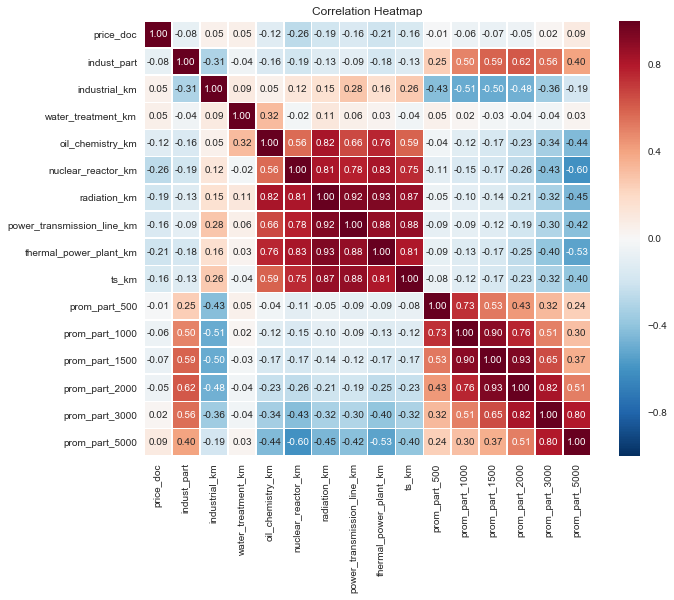

In [22]:
# create a list of features that belong to "industrial zone" feature groups + target variable
prom_features = ['price_doc'] + dict_prop_features[dict_prop_features.feature_grp.str.contains('industrial zone')==True]['feature'].values.tolist()
print "{:.2f} % data missing across all the variables.".format(((data[prom_features].isnull().sum() / len(data)) * 100).sum())
corrmat = data[prom_features].corr()

plot_corr_heatmap(data[prom_features].corr(), w=10, h=8)

Apply PCA to reduce dimensionality.

*** >> Group 8: Market related features***

0.00 % data missing across all the variables.


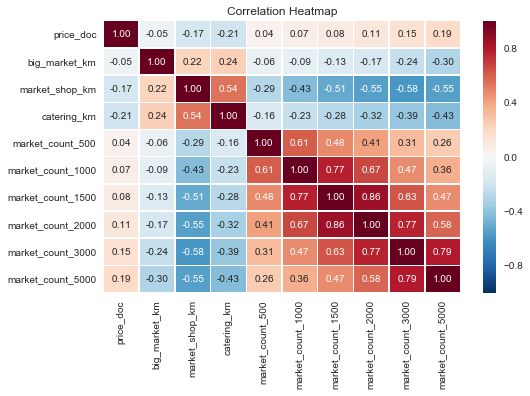

In [23]:
# create a list of features that belong to "market" feature groups + target variable
market_features = ['price_doc'] + dict_prop_features[dict_prop_features.feature_grp.str.contains('market')==True]['feature'].values.tolist()
print "{:.2f} % data missing across all the variables.".format(((data[market_features].isnull().sum() / len(data)) * 100).sum())

plot_corr_heatmap(data[market_features].corr(), w=8, h=5)

Looks like a lot of correlations are going on. Apply PCA to get rid of that and reduce dimensionality.

*** >> Group 9: Churches and Mosques***

0.00 % data missing across all the variables.


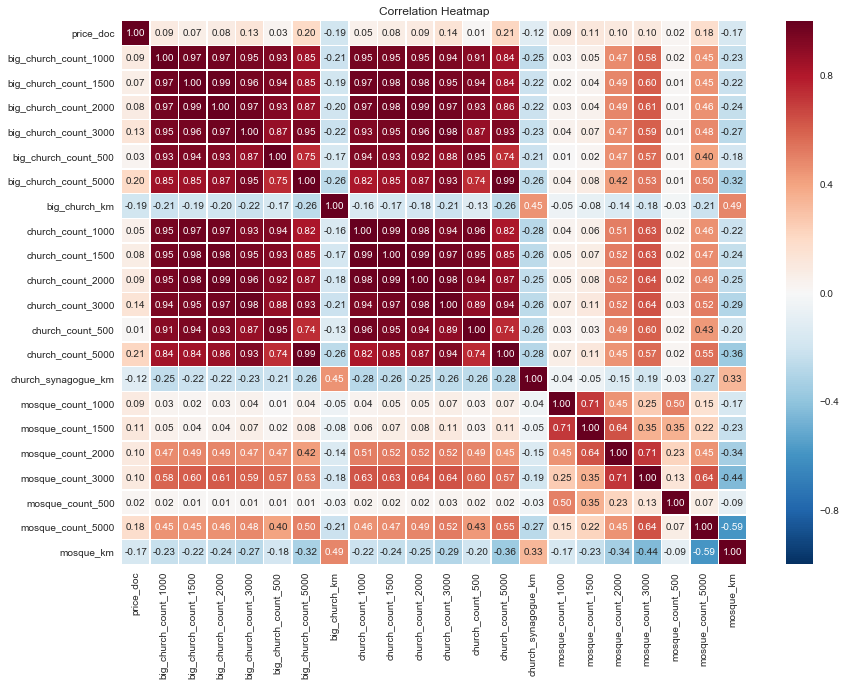

In [24]:
# create a list of features + target variable
religion_features = dict_prop_features[\
                                       (dict_prop_features.feature_grp.str.contains('church')==True)\
                                      |\
                                       (dict_prop_features.feature_grp.str.contains('mosque')==True)]\
                    ['feature'].values.tolist()
print "{:.2f} % data missing across all the variables.".format(((data[religion_features].isnull().sum() / len(data)) * 100).sum())


religion_features.sort()
religion_features = ['price_doc'] + religion_features

plot_corr_heatmap(data[religion_features].corr(), w=14, h=10)

I tried PCA, but there were a lot of significant components, so I think it is best to use logic and the above correlation matrix. I am going to keep:** `['big_church_km','church_synagogue_km','mosque_km','big_church_count_5000','mosque_count_5000']`** --> take log() of these. I kept `big_churn_count_5000`,`mosque_count_5000` because they seemed to have most correlation with the price.

*** >> Group 10: Eductaion features***

0.00 % data missing across all the variables.


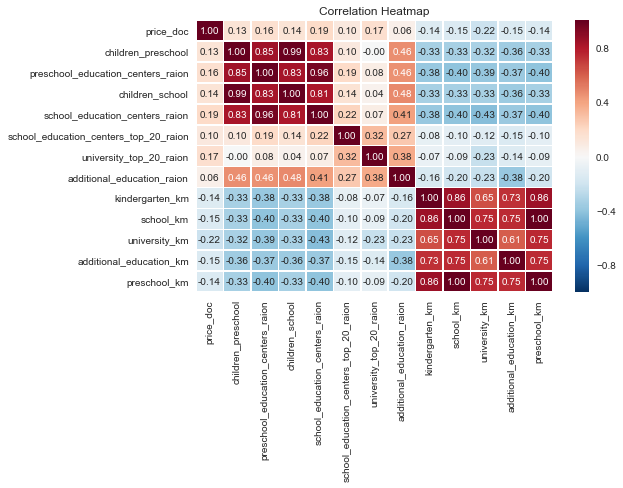

In [25]:
# create a list of features that belong to "education" feature groups + target variable
educ_features = ['price_doc'] + dict_prop_features[(dict_prop_features.feature_grp.str.contains('education')==True)]['feature'].values.tolist()
educ_features.remove('preschool_quota') # too many nulls ~20%
educ_features.remove('school_quota') # too many nulls ~20%
print "{:.2f} % data missing across all the variables.".format(((data[educ_features].isnull().sum() / len(data)) * 100).sum())

plot_corr_heatmap(data[educ_features].corr(), w=8, h=5)

All the education features are highly correlated and sort of talk about the same thing - proximity and number of different educational facilities. I think this is a good cancdidate for PCA.

*** >> Group 11: Things to do (excluding cafe)***

0.00 % data missing across all the variables.


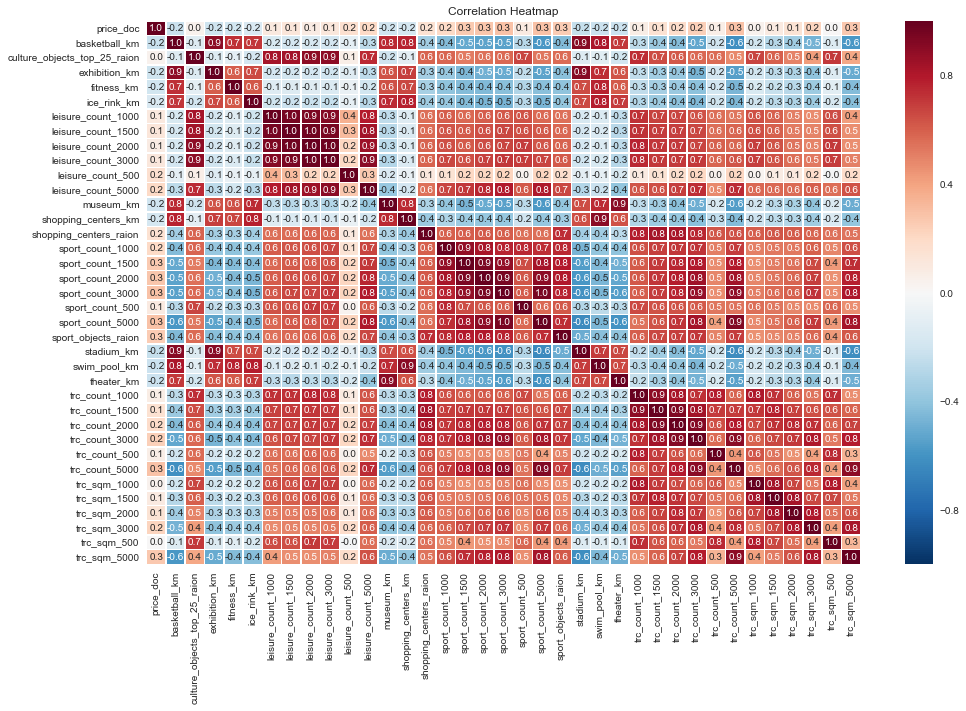

In [26]:
# create a list of features that belong to "things to do" feature groups (excl cafe, because of the num of features) + target variable
todo_features = dict_prop_features[\
    (dict_prop_features.feature_grp.str.contains('things to do')==True)\
     & \
    (dict_prop_features.feature_grp.str.contains('things to do - cafe')==False)]\
    ['feature'].values.tolist()
    
todo_features.sort()
todo_features = ['price_doc'] + todo_features

print "{:.2f} % data missing across all the variables.".format(((data[todo_features].isnull().sum() / len(data)) * 100).sum())

plot_corr_heatmap(data[todo_features].corr(), w=16, h=10, fmt='.1f')

*** >> Group 12: Things to do (cafe)***

0.00 % data missing across all the variables.


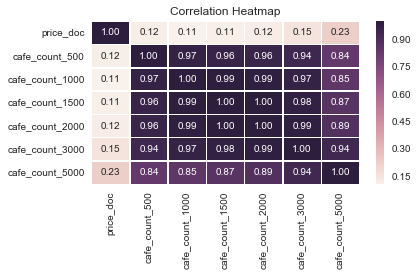

In [27]:
# create a list of features that belong to "things to do" feature groups (excl cafe, because of the num of features) + target variable
cafe_features = ['price_doc'] \
                + dict_prop_features[\
                                     (dict_prop_features.feature_grp.str.contains('things to do - cafe')==True)\
                                      &\
                                     (dict_prop_features.feature.str.contains('price')==False)\
                ]['feature'].values.tolist()


print "{:.2f} % data missing across all the variables.".format(((data[cafe_features].isnull().sum() / len(data)) * 100).sum())

plot_corr_heatmap(data[cafe_features].corr(), w=6, h=3)

### Algorithms and Techniques
As I mentioned before, I will be using Linear models (Linear and Ridge regressions) as well as Decision Tree Regressor and SVR to predict sale price of a property in Moscow. One of the main goals of this project is to build a model that will do a good job of predicting property prices, but another very important goal is to understand the important features. Also, I always keep Occam's Razor in mind - no need to complicate things if simple solutions give good results. For these reasons, I want to focus on the simpler models that are easier to interpret. 
* **Linear Regression** seems like a good choice because it is the least complicated model that is able to predict prices. It was also widely used in the literature that I have reviewed. It's mechanism is very simple: it assigns a weight to each feature and is trying to tune that weight by minimizing the Squared Error loss function. Ideally, it requires feature independence and identically independently distributed error terms. It is also a bit too sensitive to outliers, which might be a problem. But I will try to mitigate all these issues in my data preprocessing steps and then I will study the residuals to see if this was the right choice of the model.
* The next model is **Ridge** regression. It is one level more complex than the Linear Regression because it introduces the regularization parameter which penalizes the model for overfitting, hence, it makes it more robust to outliers. All other reasons for using Linear Regression hold for Ridge resgression as well.
* **Decision Tree** is another simple to interpret algorithm. It creates rules that allow it split the data so that information gain is maximized after each split. This means that it it becomes more and more clear what the proper label (price, in this case, which is a sort of a label as well) is. Main advantage of the tree is that it can create intricate boundaries (so if the relationship is non-linear, we should be able to pick it up to some extant here) and it is easy to interpret the results. The disadvantage of the trees is that they can easily overfit data and can be too sensitive to variations in data. I will try to tune the tree complexity to control that behavior.
* The last algorithm, **SVR**, is able to estimate non-linear relationships using the kernel trick: the training data is mapped into a higher dimensional space using kernel and that allows the model to fit linear function to the higher dimensional data. It is also robust to outliers since it only cares about part of the training data - the points that are close to the line that is being fitted into the higher dimensional data. One of the issues with this model is that it requires the most hyper-parameters:
    - regularization term C that penalizes error
    - special parameter epsilon that specifies the distance from the true value the prediction can fall in without being penalized - in other words, it affects complexity of the boundary, relates to overfitting
    - kernel can also be selected<br>
This leads to SVR being much more resource instensive. It is also much harder to interpret resulting coefficients. I would still try this model to see if perhaps non-linear model describes the data better.

To summarize, I am starting with the simplest linear models that have potential to fit the data (based on my understanding of the problem and previous research). But I will also try non-linear models of various complexity to make sure I check other options.

Selected models require data to be cleaned and normalized in order to produce valid estimates. The techniques I will be using to achive this are:
- imputing null values with median (for numeric) and most popular (for categorical) values. I will not include a varaiable in my analysis if more then 20% of data is missing.
- creating dummies for majority of categorical data
- convering categories of ordered categotical data to numbers for some categorical variables (like `ecology`)
- manually transforming several variables to create new dummy features based on my knowledge of the city (distances to main roads)
- **taking log() of all numerical features to normalize them. I also tried applying StandardScaler to some features, but my erros got worse, so I decided to stick tith logarithms for normalization and reduction of variance.**
- applying PCA on several feature groups I have identified before to reduce dimensionality and multicollinearity. I will apply PCA on feature groups separately because I still want to be able to infer some meaning behind the coefficients and I also believe based on my domain knowledge that identified feature groups are mostly independent o each other.

After data is clean I will apply the aforementioned algorithms. I will start by applying the default sklearn version of the algorithm with preset hyperparameters to get an original understanding of performance of those models. Then, I will move to tuning the models using Grid Search function from sklearn liabrary. I will then be able to make the final selection of my model.

I will be using RMLSE, the function I have defined, to calculate the error of the models and compare the models between each other.

### Benchmark
The benchmark model for this problem is provided as part of the competition. This model calculates the mean of all the sale prices and assigns this mean value to all new examples. It achieves RMSLE of 0.52891 which currently places this solution between 1953 and 1954 place.Best models on today's date achieve RMSLE of approximately 0.30. Details of the current best solutions are not yet disclosed. I will be comparing my results to both these benchmarks using RMSLE.

I would also like to note that training data from kaggle is significantly different from testing data from kaggle, which has been noted in forum discussions and I have experienced as well. So the above benchmark score will be compared to the estimates I obtain on kaggle_test data after selecting my final model using kaggle training data. The scores on kaggle training data will be compared against another benchmark model which will be constructed the same way as the one on kaggle's website: average sale price. This model achieves RMLSE of ~0.62.


## III. Methodology

### Data Preprocessing

First preprocessing step is to **apply PCA to the feature groups** identified above. Since I will be applying PCA on multiple groups independently, I will create several functions below. Note, before PCA is applied, I tranform each variable with `np.log1p(x)` to standardize the input and get rid of all `0` values I might have, so PCs can be created. I also replace all missingvalues with median.

In [28]:
from sklearn.decomposition import PCA

# Set dafault variables for reproductibility
random_state = 1982

def try_pca(feature_list, n_components=0 ):
    """ 
    Fit PCA to the provided list of features.
    Default value for the number of PCA components is the number of features provided. You can provide other numbers if desired.
    The data is cleaned to make sure PCA doesn't fail.
    A graph of PCs is returned in the result.
    """
    # clean the data to make sure PCA runs
    good_data = np.log1p(data[feature_list])
    good_data = good_data.fillna(good_data.median()) # replace nulls with means
    print "{:.0%} of observations dropped because of Nulls.".format(1-float(good_data.shape[0])/float(data.shape[0]))
    
    # create PCA object
    if n_components == 0:
        pca = PCA(n_components = good_data.shape[1], random_state = random_state)
    else:
        pca = PCA(n_components = n_components, random_state = random_state)
    
    # fit the data
    pca = pca.fit(good_data)

    # Generate PCA results plot
    import plot_pca_results as plt_pca
    pca_results = plt_pca.pca_results(good_data, pca)
    
def reduce_data(feature_list, n_components, columns):
    """ 
    Fit PCA to the provided list of features. The data is cleaned to make sure PCA doesn't fail.
    Specify the number of PCs to keep.
    Provide column names for the created components.
    PCA object and transformed data is returned in the result.
    """
    
    # clean the data to make sure PCA runs
    good_data = np.log1p(data[feature_list])
    good_data = good_data.fillna(good_data.median()) # replace null values with mean
    
    # Apply PCA by fitting the good data with only two dimensions
    pca = PCA(n_components = n_components, random_state = random_state)
    pca = pca.fit(good_data)

    # Transform the good data using the PCA fit above
    reduced_data = pca.transform(good_data)

    # Create a DataFrame for the reduced data, keeping the same index
    reduced_data = pd.DataFrame(reduced_data, columns = columns, index = good_data.index)
    
    # Outputs the reduced data and fitted PCA (so it can be applied to transform other data)
    return reduced_data, pca

def pca_tranform_data(df, pca, columns):
    """
    Prepare kaggle_test data for PCA and apply existing PCA object to that data.
    Returns tranformed data.
    """
    # prepare data for pca
    good_data = np.log1p(df[feature_list])
    good_data = good_data.fillna(good_data.median()) # replace nulls with means
    
    # apply existing pca on new data and save the reduced data in a dataframe
    reduced_data = pca.transform(good_data)
    reduced_data = pd.DataFrame(reduced_data, columns = columns, index = good_data.index)
    
    return reduced_data

0% of observations dropped because of Nulls.


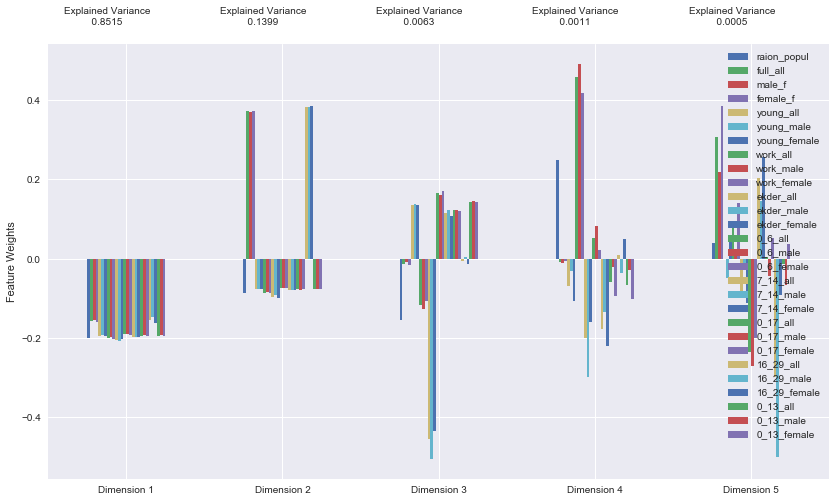

In [29]:
# Demographic features
demo_features = demo_features[1:] #remove price_doc from the feature list for PCA
feature_list = demo_features
try_pca(feature_list, n_components=5)

Looks like most of the variance can be explained by the first two components, so we don't need the rest:

In [30]:
reduced_demo_data, pca_demo = reduce_data(feature_list, n_components = 2, columns = ['Demo_Dim_1', 'Demo_Dim_2'])
reduced_demo_kaggle_test = pca_tranform_data(kaggle_test[demo_features], pca_demo, ['Demo_Dim_1', 'Demo_Dim_2'])

Features to use:
**`['Demo_Dim_1', 'Demo_Dim_2']`**

You can see my process in the previous example. It was to 'try_pca' at first, than visually inspect the graph and pay attention to the explained variance. Then I would choose the number of PCs to keep for data transformation. I will quote out the `try_pca` part to save space, but you can easily unquote it and see for yourself.

In [31]:
# Transit features
transit_features = transit_features[1:] #remove price_doc from the feature list
transit_features.remove('railroad_1line') # remove railroad_1line from the list - object
transit_features.remove('railroad_terminal_raion') # remove railroad_terminal_raion from the list - object
feature_list = transit_features
#try_pca(feature_list, n_components = 5)

Looks like most of the variance can be explained by the first three components, so we don't need the rest:

In [32]:
reduced_transit_data, pca_transit = reduce_data(feature_list, n_components = 3, columns = ['Transit_Dim_1', 'Transit_Dim_2', 'Transit_Dim_3'])
reduced_transit_kaggle_test = pca_tranform_data(kaggle_test[transit_features], pca_transit, ['Transit_Dim_1', 'Transit_Dim_2', 'Transit_Dim_3'])

Features to use:
**`['Transit_Dim_1', 'Transit_Dim_2','Transit_Dim_3']`**

In [33]:
# Education features
educ_features = educ_features[1:] #remove price_doc from the feature list for PCA
feature_list = educ_features
#try_pca(feature_list, n_components = 5)

First 4 features seem to capture almost all variance.

In [34]:
reduced_educ_data, pca_educ = reduce_data(feature_list, n_components = 4, columns = ['Educ_Dim_1', 'Educ_Dim_2', 'Educ_Dim_3', 'Educ_Dim_4'])
reduced_educ_kaggle_test = pca_tranform_data(kaggle_test[educ_features], pca_educ, ['Educ_Dim_1', 'Educ_Dim_2', 'Educ_Dim_3', 'Educ_Dim_4'])

Features to use:
**`['Educ_Dim_1', 'Educ_Dim_2','Educ_Dim_3','Educ_Dim_4']`**

In [35]:
# Manufacturing features
prom_features = prom_features[1:] #remove price_doc from the feature list for PCA
prom_features.remove('thermal_power_plant_raion') # remove thermal_power_plant_raion from the list - object
prom_features.remove('oil_chemistry_raion') # remove oil_chemistry_raion from the list - object
prom_features.remove('radiation_raion') # remove radiation_raion from the list - object
prom_features.remove('nuclear_reactor_raion') # remove nuclear_reactor_raion from the list - object
feature_list = prom_features
#try_pca(feature_list, n_components = 5)

Looks like most of the variance can be explained by the first three components, so we don't need the rest. These three components also sort of make sense.
- The first component combines all variables related to manufacturing in the area ('prom' is short for manufacturing in Russian) 
- The second component seems to be mostly influenced by oil and chemistry manufacturing
- The third component is mostly affected by proximity to nuclear reactors.

In [36]:
reduced_prom_data, pca_prom = reduce_data(feature_list, n_components = 3, columns = ['Prom_Dim_1', 'Prom_Dim_2', 'Prom_Dim_3'])
reduced_prom_kaggle_test = pca_tranform_data(kaggle_test[prom_features], pca_prom, ['Prom_Dim_1', 'Prom_Dim_2', 'Prom_Dim_3'])

Features to use:
**`['Prom_Dim_1', 'Prom_Dim_2','Prom_Dim_3']`**

In [37]:
# Market features
market_features = market_features[1:] #remove price_doc from the feature list for PCA
market_features.remove('big_market_raion') # remove big_market_raion from the list - object
feature_list = market_features
#try_pca(feature_list)

First three components have most of the variance - let's keep them.

In [38]:
reduced_market_data, pca_market = reduce_data(feature_list, n_components = 3, columns = ['Market_Dim_1', 'Market_Dim_2', 'Market_Dim_3'])
reduced_market_kaggle_test = pca_tranform_data(kaggle_test[market_features], pca_market, ['Market_Dim_1', 'Market_Dim_2', 'Market_Dim_3'])

Features to use:
**`['Market_Dim_1', 'Market_Dim_2','Market_Dim_3']`**

In [39]:
# Leasure activities
todo_features = todo_features[1:] #remove price_doc from the feature list for PCA
todo_features.remove('culture_objects_top_25') # remove object
feature_list = todo_features
#try_pca(feature_list, n_components = 5)

First 5 components - ~80% of the variance.

In [40]:
reduced_todo_data, pca_todo = reduce_data(feature_list, n_components = 5, columns = ['Todo_Dim_1', 'Todo_Dim_2', 'Todo_Dim_3', 'Todo_Dim_4', 'Todo_Dim_5'])
reduced_todo_kaggle_test = pca_tranform_data(kaggle_test[todo_features], pca_todo, ['Todo_Dim_1', 'Todo_Dim_2', 'Todo_Dim_3', 'Todo_Dim_4', 'Todo_Dim_5'])

Features to use:
**`['Todo_Dim_1', 'Todo_Dim_2', 'Todo_Dim_3', 'Todo_Dim_4', 'Todo_Dim_5']`**

In [41]:
# Cafe features
#try_pca(cafe_features, n_components = 5)

First 4 components account for ~92% of variance.

In [42]:
reduced_cafe_data, pca_cafe = reduce_data(cafe_features, n_components = 4, columns = ['Cafe_Dim_1', 'Cafe_Dim_2', 'Cafe_Dim_3', 'Cafe_Dim_4'])
#reduced_cafe_kaggle_test = pca_tranform_data(kaggle_test[cafe_features], pca_cafe, ['Cafe_Dim_1', 'Cafe_Dim_2', 'Cafe_Dim_3', 'Cafe_Dim_4'])

Features to use:
**`['Cafe_Dim_1', 'Cafe_Dim_2', 'Cafe_Dim_3', 'Cafe_Dim_4']`**

Now, let's clean **categorical data**. Since I will need to do this step twice, once for data and once for kaggle_test, I will create functions.

In [43]:
def process_cat_feat(df):
    
    # replaces all yes/no variables with 1/0 --> update yes/no features to dummies
    df.replace(['yes','no'], [1,0], inplace=True)\
    # updating 'product_type' feature to a dummy
    df.replace(['Investment','OwnerOccupier'], [1,0], inplace=True)
    # replacing 'ecology' (didn't want to create 5 dummies, I feel like this is good)
    df.replace(['no data','poor','satisfactory','good','excellent'], [0,1,2,3,4], inplace=True)

    return

Now I will define another function that will finish the last preprocessing steps (take log of numeric features, deal with any nulls left) and combine all the data together in one dataset (all PCA data is currently stored separately). I am definig a function because I will need to process kaggle_test the same way.

In [44]:
def prepare_data(data):
    """ Build Clean Training Dataset -> X_all """

    # Features
    features_to_take_log = ['full_sq','floor','area_m',\
                            'kremlin_km',\
                            'cemetery_km', 'incineration_km','hospice_morgue_km','detention_facility_km',\
                            'park_km','green_zone_km','water_km',\
                            'big_church_km','church_synagogue_km','mosque_km','big_church_count_5000','mosque_count_5000']

    dummies_list = ['product_type','culture_objects_top_25','thermal_power_plant_raion','incineration_raion',\
                    'oil_chemistry_raion','radiation_raion','railroad_terminal_raion','big_market_raion','nuclear_reactor_raion',\
                    'detention_facility_raion','water_1line','big_road1_1line','railroad_1line','ecology']

    X_all = pd.DataFrame(index=data.index) # create new data frame and share the same index as data
    X_all = X_all.join(np.log1p(data[features_to_take_log]), how ='inner', rsuffix='log_')
    X_all = X_all.join(reduced_demo_data, how ='inner')
    X_all = X_all.join(reduced_transit_data, how ='inner')
    X_all = X_all.join(data[['bulvar_ring_ind','sadovoe_ind','ttk_ind','mkad_ind','big_road1_ind','big_road2_ind']],how ='inner')
    X_all = X_all.join(data['green_zone_part'], how ='inner')
    X_all = X_all.join(reduced_prom_data, how ='inner')
    X_all = X_all.join(reduced_market_data, how ='inner')
    X_all = X_all.join(reduced_educ_data, how ='inner')
    # add categorical data
    process_cat_feat(data) # preprocess categorical data
    X_all = X_all.join(pd.get_dummies(data.material, prefix ='material'), how ='inner')
    X_all = X_all.join(data[dummies_list], how ='inner')
    X_all = X_all.dropna()

    return X_all

X_all = prepare_data(data)
X_all.drop([17932,24296], inplace=True) #drop 2 outliers
# Target
y_all = pd.DataFrame(index=X_all.index)
y_all= y_all.join(data.log_price_doc, how='inner')

print "Data is clean and ready for modelling: {:,} rows, {:,} columns.".format(X_all.shape[0], X_all.shape[1])
display(X_all.head(3))

Data is clean and ready for modelling: 30,302 rows, 58 columns.


,full_sq,floor,area_m,kremlin_km,cemetery_km,incineration_km,hospice_morgue_km,detention_facility_km,park_km,green_zone_km,...,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,3.78,1.61,15.67,2.78,1.03,1.53,1.22,1.66,1.15,0.47,...,0,0,0,0,0,0,0,0,0,3
1,3.56,1.39,16.08,2.27,1.73,2.27,1.27,2.61,0.44,0.06,...,0,0,0,0,0,0,0,0,0,4
2,3.78,1.10,15.39,2.31,1.48,2.56,0.48,2.16,0.32,0.37,...,0,1,0,0,0,0,0,0,0,1


### Implementation
First, we need to split the data into training and testing data to make sure we can evaluate model's performance on unseen data. 

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=random_state)

# Show the results of the split
print "Training set has {:,} samples.".format(X_train.shape[0])
print "Testing set has {:,} samples.".format(X_test.shape[0])

Training set has 24,241 samples.
Testing set has 6,061 samples.


Next, we need to define our performace metric. Since kaggle is using RMLSE, I will need to create the same scoring metric to measure performance of my models.

In [46]:
from sklearn import linear_model # going to use: LinearRegression, Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mse, greater_is_better = False)

# calculare RMSE based on MSE
def rmse(y_true, y_pred):
    rmse = np.sqrt(mse(y_true, y_pred))
    return rmse

**Now, we are ready to start fitting the models.**
<br><br>
**1.** First model is the <u>baseline model</u> that will be compared against all the other models. I have mentioned a benchmark model from Kaggle before, but I will only be able to compare my kaggle_test dataset's scores against it, since that's what is used to calculate that metric on Kaggle. And before I can do that, I need to choose the best model using my training data. Hence, I need a baseline model for choosing my best model. I will use the same methodology as Kaggle and will use average price as my prediction. I will need two different predictions here - one based on the test data and one based on the training data.

In [47]:
# Baseline model
price_doc_train = pd.DataFrame(index=X_train.index).join(data.price_doc, how='inner')
price_doc_test = pd.DataFrame(index=X_test.index).join(data.price_doc, how='inner')
y_mean_train = np.zeros((y_train.shape[0],1))+np.log1p(price_doc_train.mean()[0])
y_mean_test = np.zeros((y_test.shape[0],1))+np.log1p(price_doc_test.mean()[0])

print "Baseline RMLSE score for training data: {:.4f}".format(np.sqrt(mse(y_train, y_mean_train)))
print "Baseline RMLSE score for testing data: {:.4f}".format(np.sqrt(mse(y_test, y_mean_test)))

Baseline RMLSE score for training data: 0.6249
Baseline RMLSE score for testing data: 0.6387


Now that I have my baseline scores I can start fitting more complicated models.

**2.** Let's start with a simple unregularized [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [50]:
# Linear Regression
lr = linear_model.LinearRegression().fit(X_train, y_train)
print "RMSE on Training set: {:.4f}".format(rmse(y_train, lr.predict(X_train)))
print "RMSE on Test set: {:.4f}".format(rmse(y_test, lr.predict(X_test)))

RMSE on Training set: 0.4832
RMSE on Test set: 0.4966


Simple Linear Rregression has no hyper parameters I will be tuning. It only really has an option of having or not having an intercept, but since my data is not centered around 0, I will keep intercept in the model.

Linear Regression gives much better results (RMLSE = 0.48) than the training benchmark model (RMLSE = 0.62). Let's see if a Regularized Linear Regression can do better.

**3.** [Ridge Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) - Linear least squares with l2 regularization. <br>First, let's run the default setup of the ridge regression and use the default value of the regularization parameter `alpha`: 1.0.

In [51]:
ridge0 = linear_model.Ridge(random_state=random_state)
ridge0 = ridge0.fit(X_train, y_train)
print "Best alpha: {:.4f}".format(ridge0.get_params()['alpha'])
print "Train RMLSE: {:.4f}".format(rmse(y_train, ridge0.predict(X_train)))
print "Test RMLSE:  {:.4f}".format(rmse(y_test , ridge0.predict(X_test )))

Best alpha: 1.0000
Train RMLSE: 0.4832
Test RMLSE:  0.4966


Results are very similar to simple Linear Regression. In the next section we will try to tune `alpha` in hopes of getting better results.<br>

Let's see if a Decision Tree Regressor can do better.

**4.** [Decision Tree Regressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) - a non-linear supervised learning method that predicts the value of a target variable by learning simple decision rules inferred from the data. As before, we start with the default version of the algorithm which means that the nodes will expand until all leaves are pure or until all leaves contain less than 2 samples.

In [52]:
from sklearn.tree import DecisionTreeRegressor as DT
dt0 = DT(random_state = random_state).fit(X_train, y_train)
print "Train RMLSE: {:.4f}".format(rmse(y_train, dt0.predict(X_train))) 
print "Test RMLSE:  {:.4f}".format(rmse(y_test , dt0.predict(X_test ))) 

Train RMLSE: 0.0358
Test RMLSE:  0.6738


The default Decision Tree clearly overfit the data (bery low training error, very high testing error). Some of the reasons are:
- there was no cross validation
- the tree was trying to optimize information gain at each split, it didn't use for the RMLSE that we use.

I will try to improve performance of the tree in the next section. Now, let's see if a Support Vector Regression can do better.

**5.** [Support Vector Regression](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html).

As before, let's run the default model. The free parameters that need tuning are C (penalty parameter of the error term) and epsilon (specifies the epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value). Another parameter worth investigating later is the kernel. The default values for these parameters are:
- C = 1.0
- epsilon = 0.1
- kernel = 'rbf'

In [53]:
from sklearn.svm import SVR #Support Vector Regression
svr0 = SVR().fit(X_train, np.ravel(y_train))
print "Train RMLSE: {:.4f}".format(rmse(y_train, pd.Series(svr0.predict(X_train))))
print "Test RMLSE:  {:.4f}".format(rmse(y_test , pd.Series(svr0.predict(X_test ))))

Train RMLSE: 0.4791
Test RMLSE:  0.4991


The default SVR performs slightly better on training data and slightly worse on testing data than Ridge and Linear regressions. Quite similar overall. It is the most complex model of all though, so if I can't improve its performace, I should choose simpler models.

Let's see if we can improve perfomance of the selected models.

### Refinement
There is nothing to tune for Linear regression, so let's start with Ridge. The parameter to tune is `alpha`, the weight of regularization term. I will be using Grid Search with 10-fold Cross Validation to achieve the best reliable results. I will also use MSE as my scorer, so that all the models are using the same metric while being tuned.

In [54]:
ridge_params = {'alpha': np.arange(0.1,20,0.5).tolist()}
ridge = GridSearchCV(linear_model.Ridge(random_state=random_state), ridge_params, scoring=scorer, cv=10).fit(X_train, y_train)
print "Best alpha: {} \nTrain RMLSE: {:.4f}".format(ridge.best_estimator_.get_params()['alpha'], np.sqrt(-ridge.best_score_))
print "Test RMLSE: {:.4f}".format(rmse(y_test, ridge.best_estimator_.predict(X_test))) 

Best alpha: 10.1 
Train RMLSE: 0.4846
Test RMLSE: 0.4967


Tuned 'alpha' is different from default 'alpha', but RMLSE is almost the same, a little worse even. I think this might have to do with the fact that default Ridge Regression didn't use cross-validation, so its score is based on one random split of training and testing data, while cross validation score is averaged over 10 different runs, it might be more reliable. Results are basically the same as the Linear Regression, but I prefer Ridge regression to Linear regression becaus of the regularization parameter and ability to mitigate overfitting on the undseen data.

Now, let's tune the Decision Tree. We will be tuning `max_depth` parameter which is responsible for the complexity of the tree using Grid Search with 10-fold CV and MSE as a scoring method.

In [55]:
dt_params = {'max_depth': range(1,21)}
dt = GridSearchCV(DT(random_state = random_state), dt_params, scoring=scorer, cv=10).fit(X_train, y_train)
print "Best max_depth: {} \nTrain RMLSE: {:.4f}".format(dt.best_estimator_.get_params()['max_depth'], np.sqrt(-dt.best_score_))
print "Test RMLSE: {:.4f}".format(rmse(y_test, dt.best_estimator_.predict(X_test))) 

Best max_depth: 6 
Train RMLSE: 0.4940
Test RMLSE: 0.4985


After tuning performance of the decision tree has improved significantly, but it is still not as good as that of the Linear Regression model, so Linear Regression is still the preferred choice.

Finally, let's tune the most complex model, SVR. I will be iterating over C and epsilon.

In [56]:
svr_params = {'C': [0.5,1.0,5.0],\
              'epsilon': [0.1,1.0,5.0]}
svr = GridSearchCV(SVR(), svr_params, scoring=scorer).fit(X_train, np.ravel(y_train))

print "Best C: {}".format(svr.best_estimator_.get_params()['C'])
print "Best epsilon: {}".format(svr.best_estimator_.get_params()['epsilon'])
print "Train RMLSE: {:.4f}".format(np.sqrt(-svr.best_score_))
print "Test RMLSE: {:.4f}".format(rmse(y_test, svr.best_estimator_.predict(X_test))) 

Best C: 5.0
Best epsilon: 0.1
Train RMLSE: 0.4834
Test RMLSE: 0.4953


The SVR model hasn't really improved after tuning, so Ridge Regression model is the final choice: keeping Occam's Razor in mind, I choose lowest complexity, with comparable results.

In [57]:
# Set ridge model to the best found model
ridge = ridge.best_estimator_

## IV. Results

### Model Evaluation and Validation
I described in detail the process of choosing the best model in the previous section. Ridge Regression model is one of the simplest models with RMLSE comparable to RMLSE of other models. 

This model has resonably well distributed errors (looks like somwhat random dustibution around 0), as shown on the graph below.

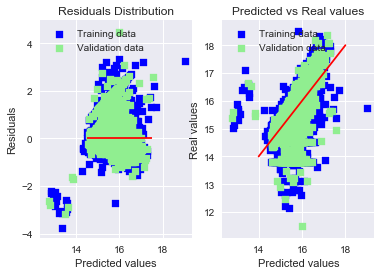

In [58]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

f = pl.figure()
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
# Plot residuals
ax0 = pl.subplot(gs[0])
ax0.set(title='Residuals Distribution', xlabel = "Predicted values", ylabel="Residuals" )
pl.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
pl.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
pl.legend(loc = "upper left")
pl.hlines(y = 0, xmin = 14.5, xmax = 17.5, color = "red")
# plot % missing values by feature
ax1 = pl.subplot(gs[1])
pl.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
pl.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
pl.title("Linear regression")
pl.xlabel("Predicted values")
pl.ylabel("Real values")
pl.legend(loc = "upper left")
pl.plot([14, 18], [14, 18], c = "red")
ax1.set(title='Predicted vs Real values', xlabel = "Predicted values", ylabel="Real values" )
pl.show()

The important features also make sense. The highest contributor to the sale price is the size of the property. Material also matters and I am happy to see the indicators of distance to the city center that I have created (because I lived in Moscow for many years and I realized that original features won't achieving the right result) are among the top predictors (bulvar_ring_ind, sadovoe_ring_ind, ttk_ind).

Ridge picked 57 features and eliminated the other 1 features


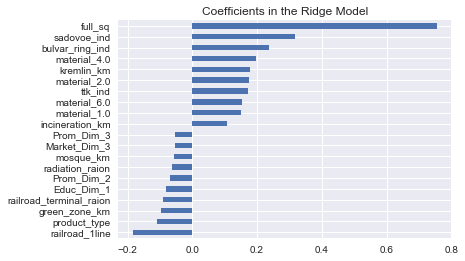

In [59]:
# Plot important coefficients
coefs = pd.Series(np.ravel(ridge.coef_), index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
pl.title("Coefficients in the Ridge Model")
pl.show()

Let's test robustness of the training model by predicting sale price of the kaggle_test dataset, uploading the predictions to kaggle.com and collecting back the RMLSE score from the website (since I don't have sales price for kaggle_test data).

In [60]:
# prepare kaggle_test for modelling
# impute NaNs:
kaggle_test.fillna(kaggle_test.describe(include=['object']).loc['top'], inplace=True) # replace missing categorical values with the most popular value
kaggle_test.fillna(kaggle_test.median(), inplace=True) # fill missing values with mean values for respective columns
# the rest of preprocessing
X_kaggle_test = prepare_data(kaggle_test)
print "Data is clean and ready for modelling."
print X_kaggle_test.shape,': should be 7662 rows for successful submission to kaggle.com'

Data is clean and ready for modelling.
(7662, 58) : should be 7662 rows for successful submission to kaggle.com


In [61]:
y_test_pred = ridge.predict(X_kaggle_test) # make predictions
# convert the price back to RUB from log1p(RUB) and join to the 'id' tobe able to submit
y_test_pred = pd.DataFrame(y_test_pred, columns=['log_price_doc'], index=X_kaggle_test.index)
y_test_pred = y_test_pred.join(kaggle_test['id'], how ='inner')
y_test_pred['price_doc']=np.expm1(y_test_pred.log_price_doc)
y_test_pred = y_test_pred.drop('log_price_doc', axis=1)
print "Predicted", y_test_pred.shape[0], 'prices'
# save the file with predictions
y_test_pred.to_csv(path_or_buf="data\\submission_ridge.csv", header=True, index=False)

Predicted 7662 prices


My final score on kaggle is: 0.34792.
The kaggle_test benchmark is around 0.52 and the [top winning scores](https://www.kaggle.com/c/sberbank-russian-housing-market/leaderboard) on the public leaderboard are 0.30 and 0.31, so I think my solution is pretty robust to unseen data and is relatively accurate.

![alt text](submission_ridge_score.jpg "Kaggle_test RMLSE score")

### Justification
As discussed in the previuos section, the final results are stronger than the benchmark (0.34 vs 0.52). They are only 4 pasic points worse than the wimming solution.

I don't think, however, my final solution is accurate enough to be used in banking for predicting prices. The graphs comparing predicted vs real price show a lot of errors. But it definitely is accurate enough to understand high level price drivers, which was the task I chose for this analysis. I also have engineered new and significant variables (bulvarnoe_ring_ind, sadovoe_ring, ttk_ind) that other people can use in their models to, hopefully, improve theier results.

## V. Conclusion

### Free-Form Visualization
I have provided plenty of variuos visualizations during my analysis. The one that I think speaks to the value of my work the most is the significant predictors of price:

![alt text](important_features.jpg "Predictors")

I will mention again that I have created these features in complete autonomy because I lived in Moscow for many years and I understand some of the price drivers specific to the city. Using this knowdlge I realized that original features would not be useful, but they can be transformed. And I am very happy to see my features being significant predictors of price.

### Reflection
The problem I chose to tackle in this project was predicting sale price of a property in Moscow using hundreds of features provided by one of Russian banks. I used the process that was tought during the MLE course. First, I looked at the data and tried to understand the features and how they might relate to the problem. I also considered the models that are appropriate for predicting the price of a property. Then I identified problems with the data (outlies, missing data) and prepropcessing steps required to deal with the problems as well as categorical data. I also considered dimensionality reduction and feature engineering. After the data was clean, I fit and tuned my models. Then I chose the best model using RMLSE and tested the model on undeen data.

One of the most intersting aspects of the project for me was using my domain expertise and creating completely new features. That really showed the power of well thought out features. Another related aspect was the fact that simple models performed quite well and tuning of the hyper-parameters didn't improve the results a lot. This again reinforces importance of spending time with the features. I spent a vast majotity of my time experimenting with features and thinking about what they mean for the model. I think it paid off.

A very difficult aspect was data preparation. It took a long time to clean and standardize all the data.

### Improvement
I definitely see multiple areas of improvement for this project:
- First of all, I had to scale back and couldn't use the macro data in my analysis. I think it could be beneficial to include that data in the model. Russian economy is very closely tied to oil prices, it might affect property prices in some way.
- Price is very volatile, it would be interesting to check it for heteroschedasticity.
- I was also considering splitting data into 2 groups based on price, because it seems that there could be clusters of elite properties (very high price) and regular properties. That would involve creating a classiciation model first in order to be able to classify new examples as elite or regular and then predict price for the predicted group.
- Including dummies for seasonality (monthly or seasons' dummies)
- Incorporate autoregressive elements like price lag and time trend. I am positive that the model needs more time series elements, but it is outside of the scope of this project. 

-----------

*Thank you for your time!*

*Olga K *